# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Christian Julianto Sayono]
- **Email:** [christianjulianto1707@gmail.com]
- **ID Dicoding:** [MS108D5Y0567]

## Menentukan Pertanyaan Bisnis

- Bagaimana Pola Penyewaan Sepeda Berdasarkan Musim?
- Apakah Ada Perbedaan Signifikan Pola Penyewaan pada Jam Sibuk dan Jam Santai?

## Import Semua Packages/Library yang Digunakan

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [26]:
# Membaca file CSV ke dalam DataFrame
hour_df = pd.read_csv('data/hour.csv')

# Menampilkan lima baris pertama dari DataFrame
hour_df.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset hour.csv berisi data penyewaan sepeda per jam yang memberikan rincian waktu secara granular, memungkinkan analisis pola penyewaan lebih mendetail.
- Fungsi `read_csv()` dari library `pandas` digunakan untuk membaca file hour.csv dan menyimpannya dalam variabel `hour_data` sebagai sebuah `DataFrame`.

### Assessing Data

In [27]:
# Mengecek informasi data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [28]:
# Mengecek missing values
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [29]:
# Mengecek duplicated values
print(hour_df.duplicated().sum())

0


In [30]:
# Mengecek nilai statistik
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- Fungsi `info()` untuk melihat struktur umum `DataFrame`. Semua kolom memiliki tipe data yang sesuai, memudahkan proses pengolahan data selanjutnya.
- Kemudian, saya melakukan pengecekkan nilai kosong dan duplikat pada dataset menggunakan fungsi `isnull()` dan `duplicated()`. Tidak ada missing values maupun duplikat dalam dataset, sehingga data siap untuk dianalisis.
- Fungsi `describe()` untuk melihat nilai statistik umum seperti nilai mean, median, max, dan lain sebagainya.

### Cleaning Data

In [31]:
# Konversi kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df["dteday"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


In [32]:
# Menambahkan label musim
if 'season_label' not in hour_df.columns:
    season_dict = {
        1: 'Spring', 
        2: 'Summer', 
        3: 'Fall', 
        4: 'Winter'}
    
    hour_df['season_label'] = hour_df['season'].map(season_dict)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Spring


**Insight:**
- Data sudah dalam kondisi baik karena saat proses *Assessing Data*, tidak terdapat nilai `null` atau `NaN`. Oleh karena itu, tidak perlu melakukan pembersihan data menggunakan fungsi seperti `fillna()` ataupun `dropna()`.  
- Kolom yang perlu diperbaiki adalah kolom `dteday`, yang tampaknya merupakan kolom tanggal. Namun, berdasarkan hasil `info()`, kolom tersebut bertipe data `object`. Oleh karena itu, fungsi `to_datetime()` dari pandas untuk mengonversinya ke tipe data `datetime`, sehingga analisis waktu dapat dilakukan dengan lebih akurat.  
- Label musim ditambahkan untuk mempermudah identifikasi pola musiman dalam penyewaan.  

## Exploratory Data Analysis (EDA)

### Explore Pola Musiman

C:\Users\chris\AppData\Local\Temp\ipykernel_9372\4017670638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='cnt', data=hour_df, errorbar=None, palette=colors)


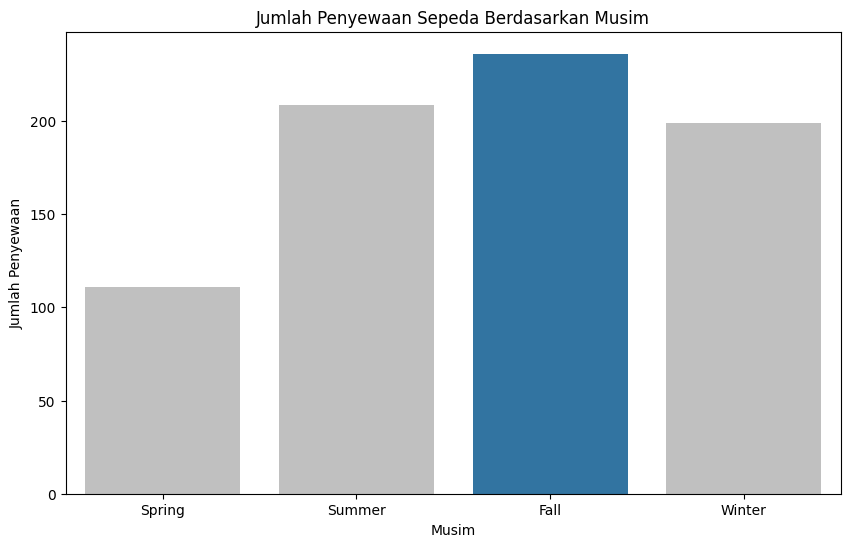

In [33]:
plt.figure(figsize=(10,6))
colors = ['#C0C0C0', '#C0C0C0', '#1f77b4', '#C0C0C0']

sns.barplot(x='season_label', y='cnt', data=hour_df, errorbar=None, palette=colors)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Visualisasi ini menggunakan **`sns.barplot`** untuk menampilkan jumlah penyewaan sepeda berdasarkan musim. Dengan mengatur palet warna, bar untuk musim **Fall** dibuat lebih menonjol, sementara musim lain menggunakan warna pudar. Teknik ini membantu menyoroti musim dengan penyewaan tertinggi secara visual tanpa mengubah data.
- **Musim Fall** memiliki jumlah penyewaan tertinggi, yang terlihat jelas dari bar yang menonjol. Ini menunjukkan bahwa cuaca sejuk pada musim gugur menarik lebih banyak pengguna sepeda.


### Explore Pola Jam Sibuk

C:\Users\chris\AppData\Local\Temp\ipykernel_9372\3680688749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='peak_hour', y='cnt', data=hour_df, palette='Set1')


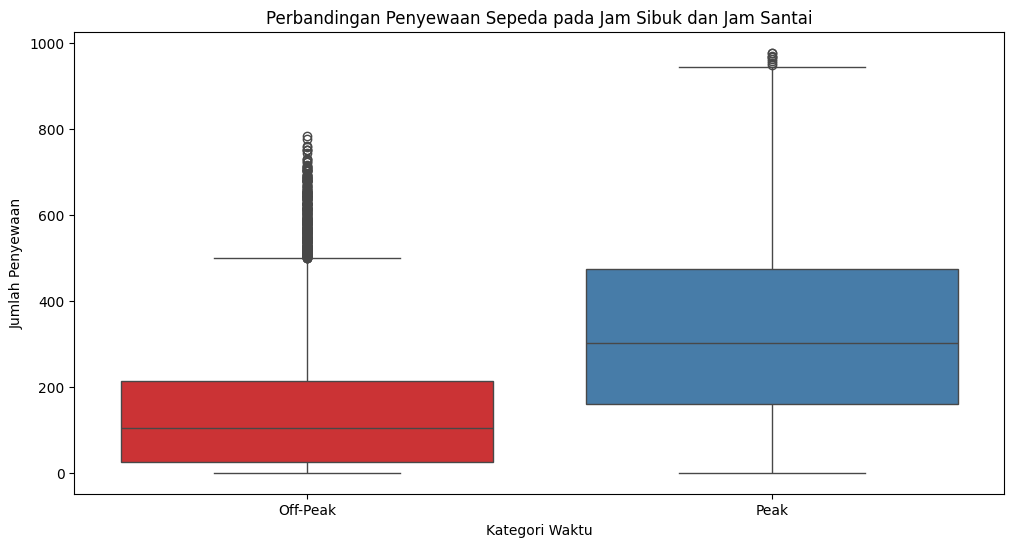

In [34]:
# Definisikan jam sibuk: 7-9 pagi dan 5-7 sore
hour_df['peak_hour'] = hour_df['hr'].apply(lambda x: 'Peak' if x in [7,8,9,17,18,19] else 'Off-Peak')

plt.figure(figsize=(12,6))
sns.boxplot(x='peak_hour', y='cnt', data=hour_df, palette='Set1')

plt.title('Perbandingan Penyewaan Sepeda pada Jam Sibuk dan Jam Santai')
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Visualisasi ini menggunakan **`sns.boxplot`** untuk membandingkan distribusi jumlah penyewaan sepeda pada jam sibuk dan jam santai. **Boxplot** efektif untuk menampilkan median, kuartil, dan outlier, sehingga mempermudah analisis variasi penyewaan dalam dua kategori waktu.
- Terdapat peningkatan signifikan dalam jumlah penyewaan selama jam sibuk, menunjukkan bahwa sepeda banyak digunakan untuk aktivitas komuter seperti perjalanan ke kantor atau sekolah.

### Univariate & Bivariate Analysis

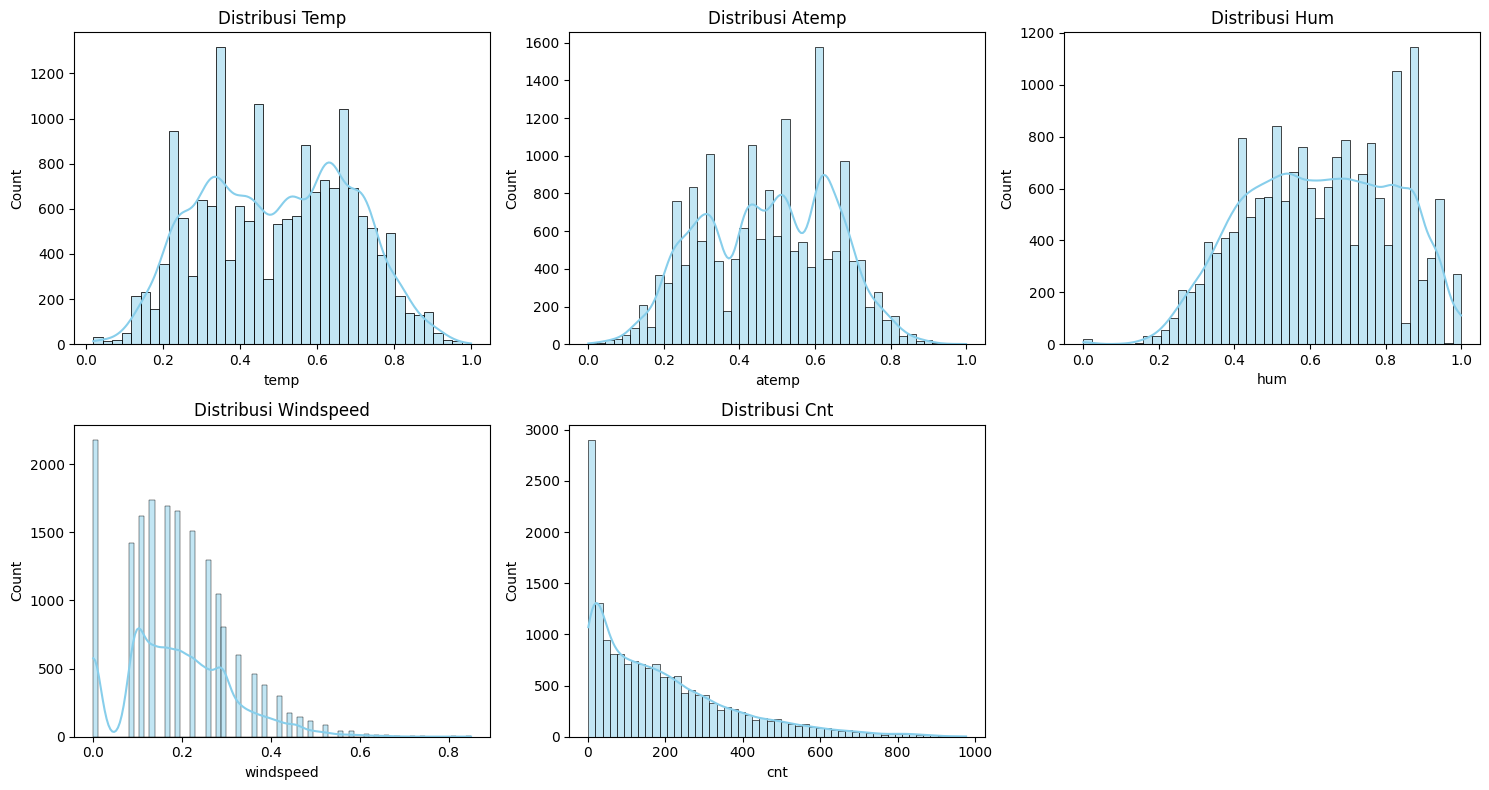

C:\Users\chris\AppData\Local\Temp\ipykernel_9372\1315965814.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


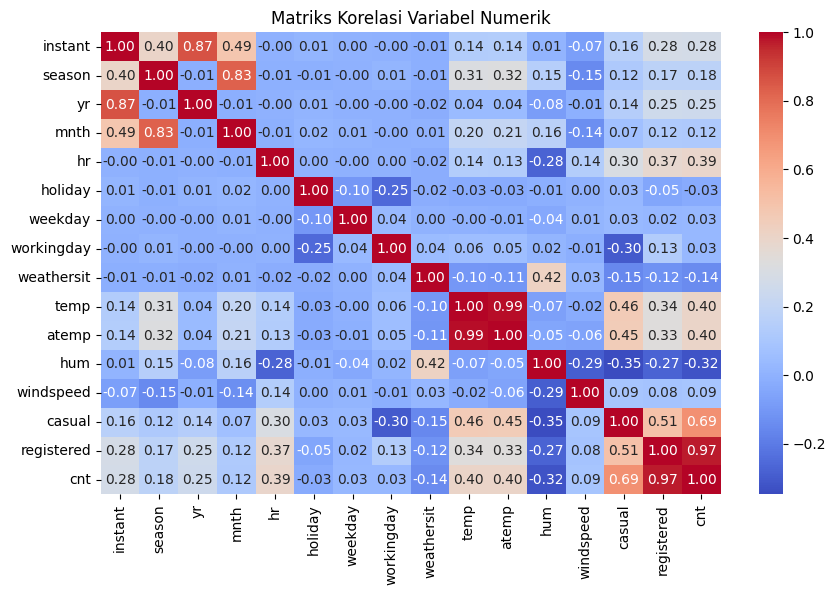

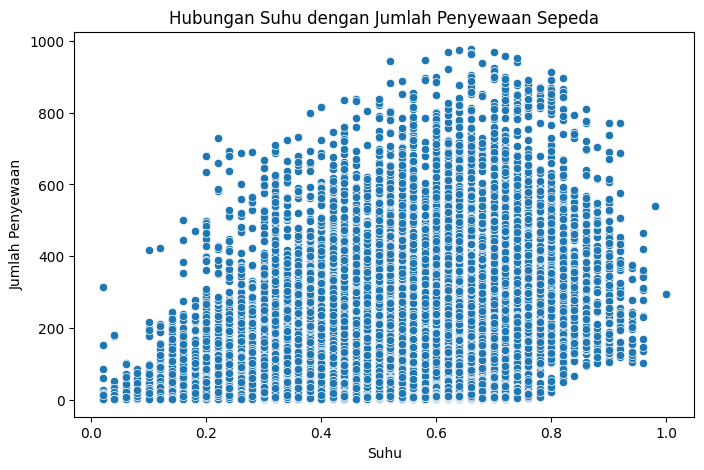

In [35]:
# Analisis distribusi dari variabel numerik
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hour_df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col.capitalize()}')
plt.tight_layout()
plt.show()

# Korelasi antara variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

# Scatter plot suhu vs jumlah penyewaan
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- **Univariate analysis** membantu memahami distribusi dari setiap variabel secara individu. Sebagai contoh, distribusi `cnt` (jumlah penyewaan) menunjukkan pola yang mirip distribusi normal dengan sedikit skewness ke kanan, menandakan lebih banyak hari dengan penyewaan tinggi.
- **Bivariate analysis** menunjukkan hubungan antar variabel. Matriks korelasi mengungkapkan bahwa `temp` memiliki korelasi positif yang kuat dengan `cnt`, yang berarti semakin tinggi suhu, semakin banyak sepeda yang disewa. Sementara itu, `hum` (kelembaban) memiliki korelasi negatif yang lemah dengan penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pola Penyewaan Sepeda Berdasarkan Musim?

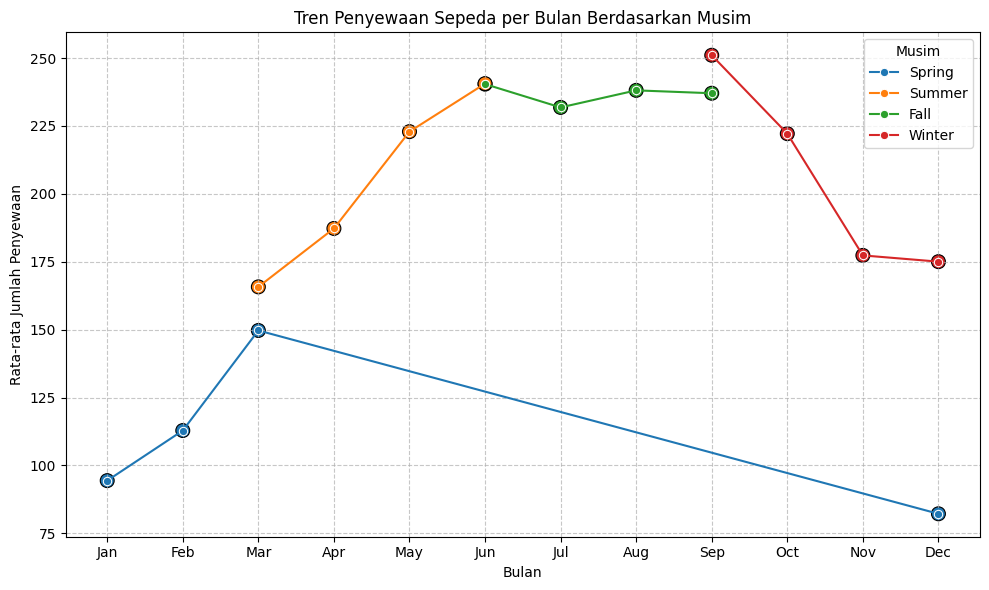

In [39]:
# Mengelompokkan data berdasarkan bulan dan musim untuk mendapatkan rata-rata jumlah penyewaan
monthly_avg = hour_df.groupby(['mnth', 'season_label'])['cnt'].mean().reset_index()
plt.figure(figsize=(10,6))

# Menggunakan lineplot untuk menunjukkan tren musiman
sns.lineplot(x='mnth', y='cnt', hue='season_label', data=monthly_avg, marker='o', palette='tab10')

# Menambahkan scatterplot untuk menonjolkan titik data rata-rata
sns.scatterplot(x='mnth', y='cnt', hue='season_label', data=monthly_avg, palette='tab10', legend=False, s=100, edgecolor='black')

# Pengaturan visualisasi
plt.title('Tren Penyewaan Sepeda per Bulan Berdasarkan Musim')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Musim', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi menggunakan **`plt.plot`** membantu menampilkan tren rata-rata penyewaan sepeda per bulan untuk masing-masing musim. Penggunaan **marker** dan **grid** memperjelas titik-titik data dan mempermudah identifikasi puncak penyewaan.
- Musim Fall menunjukkan peningkatan yang konsisten dalam jumlah penyewaan sepeda dibandingkan musim lainnya. Tren ini mencerminkan preferensi pengguna terhadap cuaca yang lebih sejuk dan nyaman untuk bersepeda.


### Pertanyaan 2: Apakah Ada Perbedaan Signifikan Pola Penyewaan pada Jam Sibuk dan Jam Santai?

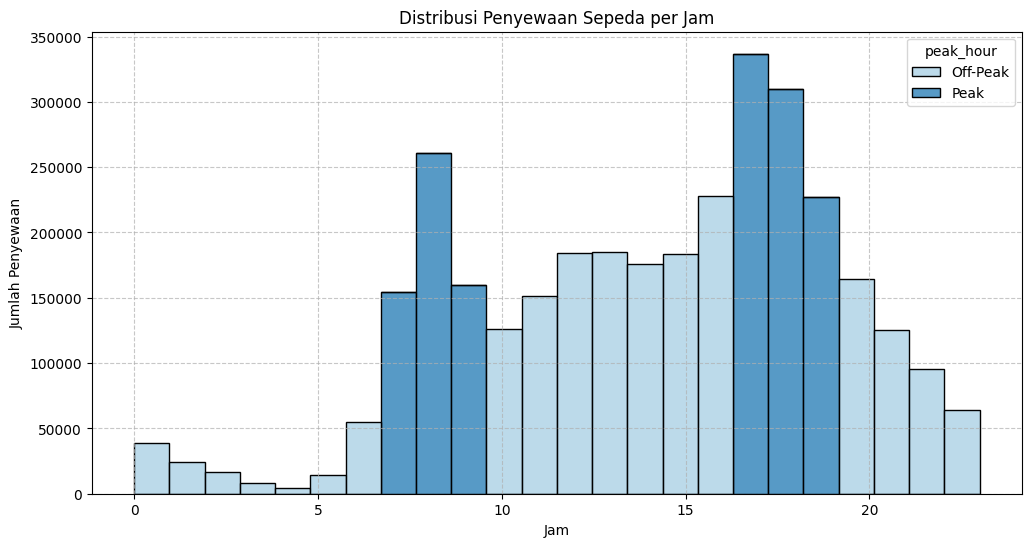

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data=hour_df, x='hr', weights='cnt', bins=24, hue='peak_hour', multiple='stack', palette='Paired')
plt.title('Distribusi Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Visualisasi ini menggunakan **`sns.histplot`** untuk menampilkan distribusi penyewaan sepeda per jam dengan membedakan antara jam sibuk dan jam santai. **Histplot** efektif untuk menunjukkan frekuensi penyewaan pada interval waktu tertentu, memberikan gambaran jelas tentang kapan puncak aktivitas penyewaan terjadi.
- Distribusi penyewaan sepeda menunjukkan lonjakan signifikan pada jam 8 pagi dan 6 sore, sesuai dengan waktu komuter. Ini mengindikasikan bahwa banyak pengguna memanfaatkan sepeda sebagai alat transportasi utama saat berangkat dan pulang kerja.



## Analisis Lanjutan (Opsional)

In [38]:
# RFM Analysis untuk Pola Musiman
rfm_df = hour_df.groupby('season_label').agg({
    'dteday': lambda x: (hour_df['dteday'].max() - x.max()).days,
    'cnt': ['count', 'sum']
}).reset_index()

rfm_df.columns = ['Season', 'Recency', 'Frequency', 'Monetary']
print(rfm_df)

   Season  Recency  Frequency  Monetary
0    Fall      100       4496   1061129
1  Spring        0       4242    471348
2  Summer      194       4409    918589
3  Winter       11       4232    841613


## Conclusion

- **Pertanyaan 1: Bagaimana Pola Penyewaan Sepeda Berdasarkan Musim?** 

Pola penyewaan sepeda menunjukkan bahwa **musim Fall** memiliki jumlah penyewaan tertinggi dibandingkan musim lainnya. Ini menunjukkan bahwa cuaca yang lebih sejuk dan nyaman pada musim gugur mendorong lebih banyak orang untuk bersepeda. Musim Fall tidak hanya memiliki total penyewaan yang tinggi tetapi juga menunjukkan konsistensi dalam rata-rata penyewaan per bulan, terutama pada bulan September dan Oktober.

- **Pertanyaan 2: Apakah Ada Perbedaan Signifikan Pola Penyewaan pada Jam Sibuk dan Jam Santai?*** 

Penyewaan sepeda meningkat secara signifikan selama **jam sibuk** (7-9 pagi dan 5-7 sore). Lonjakan ini terlihat jelas pada grafik distribusi jam, yang menunjukkan bahwa banyak pengguna memanfaatkan sepeda sebagai alat transportasi utama untuk perjalanan komuter, seperti berangkat dan pulang kerja atau sekolah. Hal ini menegaskan bahwa sepeda bukan hanya digunakan untuk rekreasi tetapi juga sebagai solusi transportasi harian.
